# Foundations of Machine Learning Frameworks Lab-6
Name: Devanshi Joshi   
Id: 8868052

In [60]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [61]:
# Load the iris dataset
iris = load_iris(as_frame=True)

print('Shape of the data (features):', iris.data.shape)

Shape of the data (features): (150, 4)


There a total of 150 rows and 4 columns in the dataset 

Bunch is a subclass of the Dict class and supports all the methods as dict does. In addition, it allows you to use the keys as attributes.   
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html


In [62]:
type(iris)

sklearn.utils._bunch.Bunch

In [63]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [64]:
# Finding the target variable values 
print('iris target_names: ',iris.target_names) 

print('\n')

# There are total 4 columns present in the dataset
print('iris data columns: ',iris.data.columns)

print('\n Information about the data')
print(iris.data.info())

iris target_names:  ['setosa' 'versicolor' 'virginica']


iris data columns:  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

 Information about the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


Looking at the first few rows of the dataset 

In [65]:
iris.data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Defining the features and the target variable

In [66]:
# Using all four features
X = iris.data.values

# Defining only 2 labels: virginica and non-virginica
y = iris.target_names[iris.target] == 'virginica'

Splitting the data into training and testing sets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Applying the Logistic Regression Model on the training data

In [68]:
Logistic_Model = LogisticRegression(random_state=42)
Logistic_Model.fit(X_train, y_train)

LogisticRegression(random_state=42)

##### Failure modes: in which data instances is the model wrong? 

In [69]:
y_probs = Logistic_Model.predict_proba(X_test)
uncertain_indices = np.where((y_probs[:, 1] >= 0.4) & (y_probs[:, 1] <= 0.6))[0]
uncertain_predictions = X_test[uncertain_indices]
uncertain_predictions

array([[6.1, 3. , 4.9, 1.8]])

It determines whether the odds of being virginica for each case is between 0.4 and 0.6. If the likelihood of an occurrence falls between 40% and 60%, the model is unclear about its categorization because the probability is near to 0.5 (the threshold for binary classification in logistic regression).

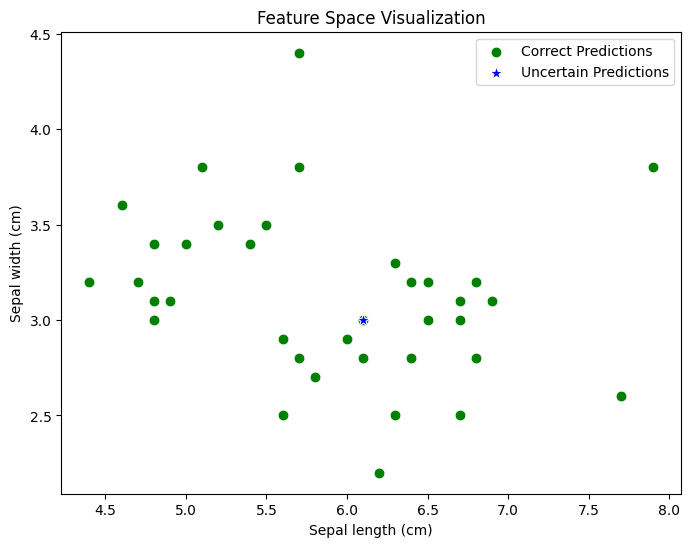

In [70]:
# Extracting the feature values for correct and incorrect predictions
correct_indices = np.where(y_test == Logistic_Model.predict(X_test))[0]
incorrect_indices = np.where(y_test != Logistic_Model.predict(X_test))[0]

# Scatter plot for the features (sepal length vs. sepal width)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[correct_indices, 0], y=X_test[correct_indices, 1], color='g', label='Correct Predictions', s=60)
sns.scatterplot(x=X_test[incorrect_indices, 0], y=X_test[incorrect_indices, 1], color='r', label='Incorrect Predictions', s=60)
sns.scatterplot(x=uncertain_predictions[:, 0], y=uncertain_predictions[:, 1], color='b', s=100, label='Uncertain Predictions', marker="*")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title('Feature Space Visualization')
plt.show()


#### Are there any shared properties for these cases? (1 point)

- Sepal length (6.1 cm): This value is in the range where both Iris virginica and Iris versicolor can be found. As a result, sepal length alone does not significantly indicate either class.
- Sepal width (3.0 cm): In the Iris dataset, a sepal width of 3.0 cm is normal and does not strongly suggest a certain class.
- Petal length (4.9 cm): Petal length can be used to differentiate between species. The petal length of Iris setosa is typically substantially shorter. However, a petal length of 4.9 cm lies inside the overlap region of Iris versicolor and Iris virginica, making it a confusing feature value for the model.
- Petal width (1.8 cm): Iris versicolor has 1.8 cm petal width, while Iris virginica has 1.8 cm petal width.

The shared properties for this uncertain prediction appear to be feature values that overlap for both Iris versicolor and Iris virginica. This makes it difficult for the logistic regression model to generate a reliable forecast. If there were more unclear situations, you'd look for similar patterns or feature value ranges to identify shared properties.

References:   
1. Santos, R. (n.d.). The Iris Flower Dataset. INPE. Retrieved from http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

2. Sukumaran, K. (2019, May 2). Classification of flower types - Iris dataset: Beginner’s Level. Retrieved from https://medium.com/@kailash7dev/classification-of-flower-types-iris-dataset-beginners-level-f022f407f5d4

3. Adegbite, P. I. (2020, December 18). Iris Flower Classification. Medium. Retrieved from https://peaceadegbite1.medium.com/iris-flower-classification-60790e9718a1

#### Evaluation Metrics:

In [71]:
y_pred_train = Logistic_Model.predict(X_train)
y_pred_test = Logistic_Model.predict(X_test)

accuracyTrain = accuracy_score(y_train, y_pred_train)
accuracTest = accuracy_score(y_test, y_pred_test)

matrixTrain = confusion_matrix(y_train, y_pred_train)
matrixTest = confusion_matrix(y_test, y_pred_test)

print("\nTraining Accuracy:", accuracyTrain)
print("Test Accuracy:", accuracTest)

print("\nTraining Confusion Matrix:")
print(matrixTrain)
print("\nTest Confusion Matrix:")
print(matrixTest)


Training Accuracy: 0.9732142857142857
Test Accuracy: 1.0

Training Confusion Matrix:
[[72  2]
 [ 1 37]]

Test Confusion Matrix:
[[26  0]
 [ 0 12]]


Training Confusion Matrix:   

True Negatives (TN): 72   
False Positives (FP): 2   
False Negatives (FN): 1   
True Positives (TP): 37   

Test Confusion Matrix:   

True Negatives (TN): 26   
False Positives (FP): 0   
False Negatives (FN): 0   
True Positives (TP): 12   

True Negatives (TN) are the number of instances accurately predicted as "non-virginica" (class 0) in both situations.
False Positives (FP) are the number of cases that were wrongly forecasted as "virginica" (class 1) when they were in fact "non-virginica."
False Negatives (FN) are the number of cases that were forecasted as "non-virginica" when they were, in fact, "virginica."
True Positives (TP) are the number of cases that were accurately predicted to be "virginica."

Based on the training and testing scores of the model, it makes very few wrong predictions in both the training and test sets. The majority of instances are correctly classified as 'virginica' or 'non-virginica.' It performs well on the test set, with no false positives or false negatives.